# Notebook 8 - Introducción a Tensorflow.


Este Notebook no es muy serio...

## 1. Operaciones con escalares, matrices y tensores.

Tensorflow implementa tipos de datos y funciones muy similares a los que hemos utilizado previamente con la librería Numpy. Sin embargo, ahora tendremos que hacer uso de las funciones dadas por Tensorflow si queremos que estas formen parte de tu grafo de operaciones. Entre los tipos de datos incluidos en la librería será común trabajar con valores escalares, vectores, matrices y tensores. Para ir tomando soltura trabajando con estos tipos de datos y también con el flujo de trabajo de Tensorflow, vamos a realizar algunas operaciones matemáticas.



In [0]:
!pip install tensorboardcolab

In [0]:
import tensorflow as tf
import tensorboardcolab
import numpy as np
tbc = tensorboardcolab.TensorBoardColab()

train_writer = tbc.get_writer()

Wait for 8 seconds...
TensorBoard link:
http://04758b1c.ngrok.io


---

**Tu tarea:** 

1. Investiga la creación y operaciones con matrices para calcular las siguiente expresiones. Recuerda que todas las operaciones deberán de incluirse en el grafo de operaciones y ser evaluadas para obtener el resultado. 


2. (**bonus**) Investiga buscando en la documentación de Tensorflow cómo podemos integrar Google Colab con **Tensorboard** para visualizar el grafo de operaciones de una manera cuqui.

> > a)  $ 5 * (-10) + 8 = -42 $

In [0]:
_a = 5 * tf.constant(-10) + 8

> >b)  $\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [0]:
_b = tf.constant(np.ones((2, 3))) + np.matrix([[1,2,3],[4,5,6]])

>> c)  $\begin{bmatrix}
 1. \\
 3. \\
 5. \\
\end{bmatrix}\begin{bmatrix}
 2. & 4. & 6. \\
\end{bmatrix} = \begin{bmatrix}
 2. & 4. & 6. \\
 6. & 12. & 18. \\
 10. & 20. & 30. \\
\end{bmatrix} $ 


In [0]:
_c = tf.constant([[1],[2],[5]]) * np.array([2,4,6])

> > d) Crea un *placeholder* de un Tensor con unas dimensiones que nos sirvan para almacenar un número indefinido de imágenes (busca cómo establecer una dimensión de tamaño indefinido), de ancho 28 píxeles, largo 28 píxeles y con 3 canales de color.

In [0]:
_d = tf.placeholder(tf.float32, shape=(None, 28, 28, 3))

In [0]:
# Inicializa todas tus variables.
init = tf.global_variables_initializer()

# Utilizando la sesión por defecto... 
with tf.Session() as session:
  
    # Inicializa todas las variables.
    sumary = session.run([_a, _b, _c])
    
    # Imprime el resultado de tu ejecución.
    [print(s, '\n') for s in sumary]
    
    # train_writer.add_graph(session.graph)
    
    

-42 

[[2. 3. 4.]
 [5. 6. 7.]] 

[[ 2  4  6]
 [ 4  8 12]
 [10 20 30]] 



## 2. Regresión Lineal con Tensorflow.

Tensorflow implementa muchas funciones diferentes e incluso otro tipo de modelos de ML que ya hemos visto previamente en el curso. Sin embargo, para ir cogiendo soltura e ir entendiendo la diferencia entre Variables, Constantes, Placeholder, etc. vamos a implementar de nuevo el Modelo de Regresión Lineal Simple. Recuerda, este modelo responde a la siguiente ecuación:

> > $ Y = w_0 + x_1 * w_1 $,

donde $Y$ y $X$ donde en este caso variables donde insertarás tus datos (Placeholders), y $w$ serán los parámetros que quieres entrenar. En este caso, definiremos toda la estructura del modelo correctamente con Tensorflow, y dejaremos este se encargue de la optimización (entrenamiento) de dicho modelo.

---

**Tu tarea:** 

1. Cargar desde Sklearn el Boston Housing dataset que ya utilizamos con antelación en otro ejercicio, y guarda como variable de entrada la columna Room Number (RM) y de salida el Valor Medio de la Vivienda (MEDV). Algo que no hicimos en su momento pero ya sabemos que procede antes del análisis es Estandirizar nuestras variable. Finalmente, para no perder las buenas costumbres, visualiza tus puntos con un *scatter plot.*

2. Una vez tengas esto hecho, vamos a comenzar a definir el modelo de ***Regresión Lineal Simple*** con Tensorflow. Primero créate dos *Placeholders* que utilizaremos para introducir tus datos de entrada y salida. Recuerda que tienes que definir correctamente las dimensiones de estos *Placeholders* (en caso de no supieras cuántos datos tienes podrías dejar estas dimensiones indefinidas). En Tensorflow puedes declarar tus parámetros con la función  ***tf.placeholder()***. Llama al tensor de valor de entrada ***_X*** y al tensor de salida ***_Y***.

3. Después procede a definir tus parámetros $w_0, w_1$, que como ya sabes serán las variables a optimizar (entrenar) de tu modelo. En Tensorflow puedes declarar tus parámetros con la función ***tf.Variable()***.

4. Una vez tengas tus variables y parámetros definidos, puedes establecer qué operaciones relacionan a tus variables de entrada, salida y parámetros (vamos, que definas las operaciones que conforman el modelo de regresión).

5. Con el tensor obtenido en el punto 4, ya tendrás la estructura que define las predicciones de tu modelo. Ahora, implementa un tensor llamado **"error"** en el que se calcule el Error Cuadrático Medio entre tu tensor de valores predicho y valores reales.

6. Una vez tengas tu modelo construido (y por tanto guardado en tu grafo de operaciones), ya está todo listo para que Tensorflow ejecute su magia y te optimize automáticamente el modelo. Normalmente tendrías que declarar tu optimizador (*Descenso del Gradiente*, mañana lo vemos) y llamar a la función ***sess.run(...)*** a la que deberás de definir con el atributo *** feed_dict=*** cuáles son tus datos de entrada y de salida del modelo. Mañana veremos esto en profunidad, así que de momento hoy este código está ya implementado. Únicamente preocúpate de que tu último *tensor* se llame "**error**" y que los placeholders de entrada y salida se llamen ***_X*** e ***_Y***. Entiende qué realiza el código.

7. Comprueba que los valores obtenidos son correctos visualizando la recta de regresión.




In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import sklearn as sk
import tensorflow as tf
from sklearn import preprocessing

from sklearn.datasets import load_boston

boston_dataset = load_boston()

# print(boston_dataset.DESCR)

X = boston_dataset.data
Y = boston_dataset.target

n, p = X.shape

print(n, p)

ROOM = X[:,5]
MEDV = Y

print(MEDV.shape, ROOM.shape)
print(MEDV[:, np.newaxis].shape, ROOM[:, np.newaxis].shape)

ROOM = preprocessing.scale(ROOM, with_mean=True, with_std=True)
MEDV = preprocessing.scale(MEDV, with_mean=True, with_std=True)

506 13
(506,) (506,)
(506, 1) (506, 1)


In [0]:
import matplotlib.colors as mcolors

Tensor("Mean_34:0", shape=(), dtype=float32)


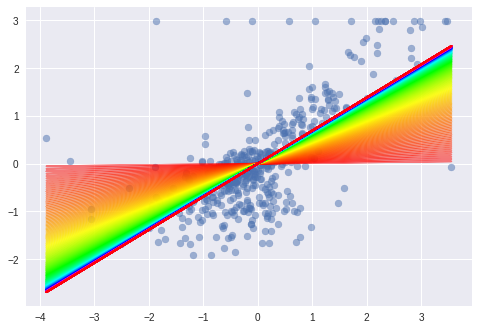

4.6985207e-09 0.693738


In [0]:

_X = tf.placeholder(tf.float32, (None, 1), name='x')
_Y = tf.placeholder(tf.float32, (None, 1), name='y')

_W0 = tf.Variable(0.0, name='w0')
_W1 = tf.Variable(0.0, name='w1')

_Yp = _X * _W1 + _W0

error = tf.reduce_mean( tf.squared_difference( _Yp, _Y ) )

print(error)

# check = tf.add_check_numerics_ops()
### ACABA TU CÓDIGO AQUÍ ###

# Valor del ratio de aprendizaje.
learning_rate = 0.01
# Función utilizada para inicializar todas las variables no inicializadas.
init = tf.global_variables_initializer()
# Definimos el optimizador a utilizar para minimizar el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)
# Número de iteraciones a cumplir.
epochs = 300

with tf.Session() as sess:
    
    # Ejecutamos el tensor para inicializar variables.
    sess.run(init)

    plt.scatter(ROOM, MEDV, alpha=0.5)
    
    # Minimizamos el coste repetidamente.
    for i in range(epochs):

        _, xd, yp, errord, W0, W1 = sess.run([optimizer, _Y, _Yp, error, _W0, _W1], 
                                             feed_dict={_X : ROOM[:, np.newaxis], 
                                                        _Y : MEDV[:, np.newaxis]})
        
        
        c = mcolors.hsv_to_rgb((i / epochs, 1, 1))
        
        
        plt.plot(ROOM, W0 + W1 * ROOM, c=c, alpha=.5)
    
    
    plt.show()
        
      
    train_writer.add_graph(sess.graph)
        
print(W0, W1)

Puke rainbows

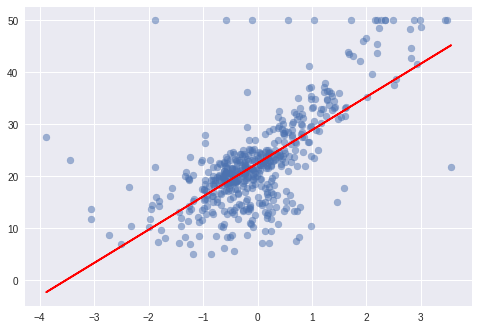

In [0]:
plt.scatter(ROOM, MEDV, alpha=0.5)
plt.plot(ROOM, W0 + W1 * ROOM, c='red')
plt.show()

In [0]:
sess.graph.get_operations()

[<tf.Operation 'Const' type=Const>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=Add>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=Add>,
 <tf.Operation 'Const_2' type=Const>,
 <tf.Operation 'mul_1/y' type=Const>,
 <tf.Operation 'mul_1' type=Mul>,
 <tf.Operation 'Placeholder' type=Placeholder>,
 <tf.Operation 'init' type=NoOp>,
 <tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'y' type=Placeholder>,
 <tf.Operation 'w0/initial_value' type=Const>,
 <tf.Operation 'w0' type=VariableV2>,
 <tf.Operation 'w0/Assign' type=Assign>,
 <tf.Operation 'w0/read' type=Identity>,
 <tf.Operation 'w1/initial_value' type=Const>,
 <tf.Operation 'w1' type=VariableV2>,
 <tf.Operation 'w1/Assign' type=Assign>,
 <tf.Operation 'w1/read' type=Identity>,
 <tf.Operation 'mul_2' type=Mul>,
 <tf.Operation 'add_2' type=Add>,
 <tf.Operation 'SquaredDifference' type=SquaredD

In [0]:
# De aquí para abajo solo estoy probando códigos de colab 

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


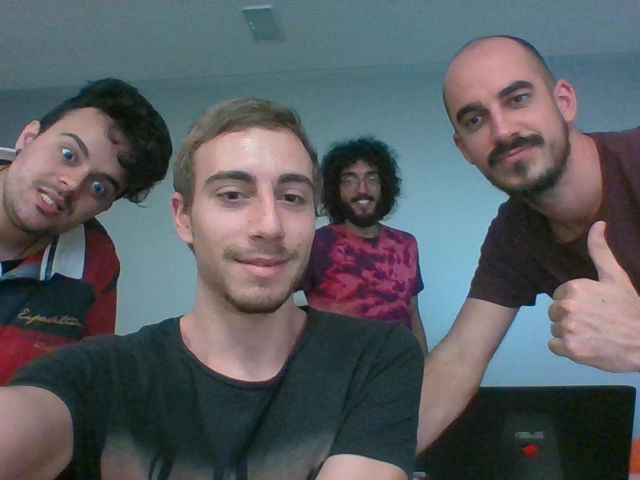

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title 4_5836918386998641272.txt, id 1juvqSU0BYwfyk-h4R2nbWvDhsOK0q5KElw6iuxdxXas
title Documento sin título.txt, id 1TvbcLGk5we9unheadG9EURPQjwKs_9W3
title untitled.txt, id 0Bwj5jXliJJwCNEQtREdtZThxZVk
